In [1]:
import datetime as dt
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from matplotlib import style
from mplfinance.original_flavor import candlestick_ohlc

import pandas as pd
import pandas_datareader.data as web

%matplotlib inline

In [2]:
style.use('ggplot')

In [3]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [4]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [5]:
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc

,Date,open,high,low,close
0,14789.0,4.778000,4.778000,3.160000,3.492000
1,14799.0,3.480000,4.128000,3.410000,4.128000
2,14809.0,4.382000,4.382000,4.044000,4.144000
3,14819.0,4.070000,4.390000,3.918000,3.918000
4,14829.0,3.920000,3.920000,3.520000,3.830000
...,...,...,...,...,...
197,16759.0,44.001999,46.321999,43.549999,46.321999
198,16769.0,46.051998,47.438000,44.903999,44.903999
199,16779.0,45.414001,46.902000,43.403999,46.091999
200,16789.0,46.512001,47.438000,45.790001,47.438000


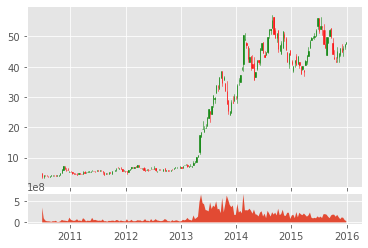

In [6]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()